In [3]:
from IPython.display import Image, display

# The Final Stage

# Week3: False Asteroids
Asteroids is a famous puzzle with the following setup and rules:
- The asteroids are placed on a grid.
- The objective is to destroy all the asteroids by shooting laser beams: either vertically or horizontally.
- Determine how to destroy all the asteroids by shooting no more than the specified number of beams.

The following image is an example of an Asteroids puzzle. In this example, the board size is 4 × 4 and we have six asteroids.

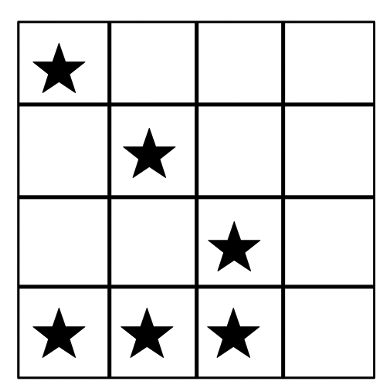

In [4]:
Image('img/asteroids_example.png')

As shown below, we can destroy all the asteroids by shooting 3 lasers vertically. Each thick blue line represents a laser beam. 

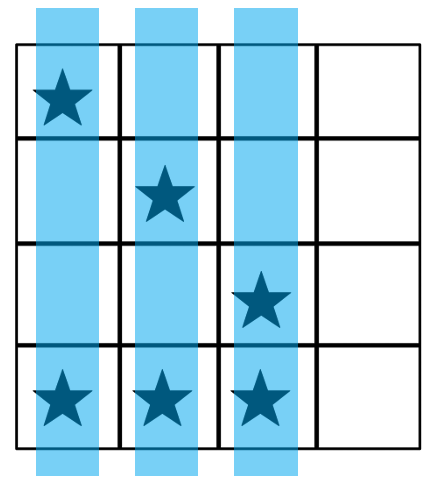

In [5]:
Image('img/asteroids_beam_example.png')

There are also false Asteroid problems. An Asteroid problem is false if the asteroids cannot be cleared within the specified number of beams. The following example is a false Asteroid problem with 3 laser beams.

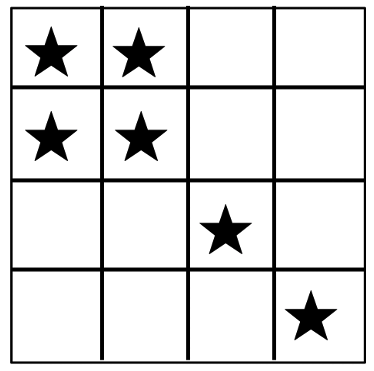

In [6]:
Image('img/false_asteroids_example.png')

----------
# Final Exercise
There are 16 areas (boards) that Dr. Ryoko needs to clear, each of which has 6 noise clusters that correspond to an asteroid in "Asteroids puzzle". However, there happens to be one area that cannot be cleared within three laser shots! Use Grover's algorithm you learned in Weeks 1 & 2 to find that one area (board)!

A board with asteroids is represented with a list of tuples. Each tuple represents the coordinate of an asteroid in the format `[row index, column index]`. Therefore, a board according to the following image can be represented as:

```
[['0', '0'], ['1', '1'], ['2', '2'], ['3', '0'], ['3', '1'], ['3', '2']]
```


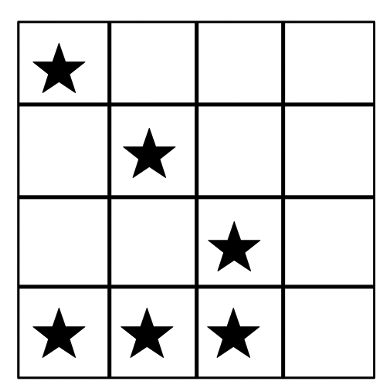

In [7]:
Image('img/asteroids_example.png')

There are 16 areas (boards) with the following configurations.
Find the area that cannot be cleared with 3 laser shots by using Grover's algorithm to help Dr. Ryoko!

In [57]:
problem_set = \
 [[['0', '2'], ['0', '3'], ['1', '1'], ['2', '0'], ['3', '0'], ['3', '1']],
 [['0', '1'], ['0', '3'], ['2', '0'], ['2', '2'], ['3', '0'], ['3', '1']],
 [['0', '0'], ['0', '3'], ['1', '1'], ['1', '3'], ['2', '2'], ['2', '3']],
 [['0', '2'], ['0', '3'], ['1', '0'], ['1', '1'], ['2', '3'], ['3', '1']],
 [['0', '1'], ['0', '2'], ['1', '0'], ['2', '0'], ['2', '3'], ['3', '3']],
 [['0', '3'], ['1', '0'], ['1', '2'], ['2', '1'], ['2', '2'], ['3', '3']],
 [['0', '1'], ['0', '3'], ['2', '0'], ['2', '3'], ['3', '2'], ['3', '3']],
 [['1', '0'], ['1', '1'], ['2', '1'], ['2', '3'], ['3', '2'], ['3', '3']],
 [['0', '1'], ['0', '2'], ['1', '0'], ['1', '3'], ['2', '3'], ['3', '0']],
 [['0', '0'], ['1', '1'], ['1', '3'], ['2', '0'], ['3', '2'], ['3', '3']],
 [['0', '1'], ['0', '2'], ['1', '3'], ['2', '0'], ['3', '0'], ['3', '3']],
 [['0', '0'], ['0', '1'], ['2', '0'], ['2', '3'], ['3', '2'], ['3', '3']],
 [['0', '3'], ['1', '0'], ['1', '2'], ['2', '2'], ['3', '0'], ['3', '3']],
 [['0', '0'], ['0', '3'], ['1', '0'], ['1', '1'], ['2', '0'], ['2', '2']],
 [['0', '1'], ['0', '3'], ['1', '2'], ['2', '0'], ['2', '1'], ['3', '2']],
 [['0', '2'], ['0', '3'], ['1', '3'], ['2', '0'], ['2', '2'], ['3', '0']]]

Answer by creating a quantum circuit to solve the puzzle shown with the problem set above. In the quantum circuit to be submitted, measure **only the `solution` (4bit)** that solves the puzzle. <br/>
To submit your solution, create a function that takes `problem_set` as an input and then returns a  `QuantumCircuit`.  You can name the function as you like. Make sure it works even with another dataset of "problem_set". We will validate your circuit with different inputs.<br/>
Make a circuit that gets the correct answer at a low cost. The lower the cost, the better.

## <span style="color: red; ">IMPORTANT: Final exercise submission rules</span>

**For solving this problem:**<br/>
- **Please implement the quantum circuit within <span style="color: red; ">28 qubits.</span>**<br/>
- Use **Grover's algorithm** you learned in Week1 & 2 with **<span style="color: red; ">iteration ＝ 1.</span>**
- The initial state for Grover's algorithm must be equal probability distributions. For example, if you want use only 3 computational bases for 2 qubits instead of 4 as the initial state. Then, the state will be $\sqrt\frac{1}{3} (|00\rangle + |01\rangle + |11\rangle)$

- Please note that you can get the answer with the same endian as the one used in Week2 explanation. You should map the index of the problem into four classical registers *`c[0:4]`* in binary. `c[0]` is the highest bit and `c[3]` is the lowest bit. For example, when mapping 12, the furthest left bit of the `1100` will be mapped to `c[0]`.
- Make sure you **create an oracle** that **doesn't require any knowledge of what the answers are**. (For example, you are not allowed to create an oracle by using a classical optimization solver to get your answers for it.)  
- With the exception of the Unroller, which is required for decomposing your circuit to calculate quantum costs, you are not allowed to use any existing transpiler passes nor original transpilers for making simplifications in this competition.
- Please **do not run jobs in succession** even if you are concerned that your job is not running properly. This can create a long queue and clog the backend. You can check whether your job is running properly at:<br/>
https://quantum-computing.ibm.com/results  
- Your score for this exercise will be same as the cost of your QuantumCircuit. The lower the cost, the better.
- Judges will check top 10 solutions manually to see if their solutions adhere to the rules. **Please note that your ranking is subject to change after the challenge period as a result of the judging process.**
- Top 10 participants will be recognized and asked to submit a write up on how they solved the exercise.

In [58]:
import numpy as np
from random import *
import matplotlib.pyplot as plt
from qiskit import IBMQ, Aer, QuantumCircuit, ClassicalRegister, QuantumRegister, execute
from qiskit.tools.monitor import job_monitor
provider = IBMQ.load_account()
backend = provider.get_backend('ibmq_qasm_simulator')

c:\users\ana\appdata\local\programs\python\python36\lib\site-packages\qiskit\providers\ibmq\ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '
ibmqfactory.load_account:WARNING:2021-02-15 02:39:10,411: Credentials are already in use. The existing account in the session will be replaced.


In [59]:
# Initialization
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# Importing Qiskit
from qiskit import BasicAer
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute

# Import basic plot tools
from qiskit.tools.visualization import plot_histogram

In [60]:
indices = [[4*int(ast[0])+int(ast[1]) for ast in board] for board in problem_set ]

In [61]:
indices

[[2, 3, 5, 8, 12, 13],
 [1, 3, 8, 10, 12, 13],
 [0, 3, 5, 7, 10, 11],
 [2, 3, 4, 5, 11, 13],
 [1, 2, 4, 8, 11, 15],
 [3, 4, 6, 9, 10, 15],
 [1, 3, 8, 11, 14, 15],
 [4, 5, 9, 11, 14, 15],
 [1, 2, 4, 7, 11, 12],
 [0, 5, 7, 8, 14, 15],
 [1, 2, 7, 8, 12, 15],
 [0, 1, 8, 11, 14, 15],
 [3, 4, 6, 10, 12, 15],
 [0, 3, 4, 5, 8, 10],
 [1, 3, 6, 8, 9, 14],
 [2, 3, 7, 8, 10, 12]]

#### One simple yet not optimized solution

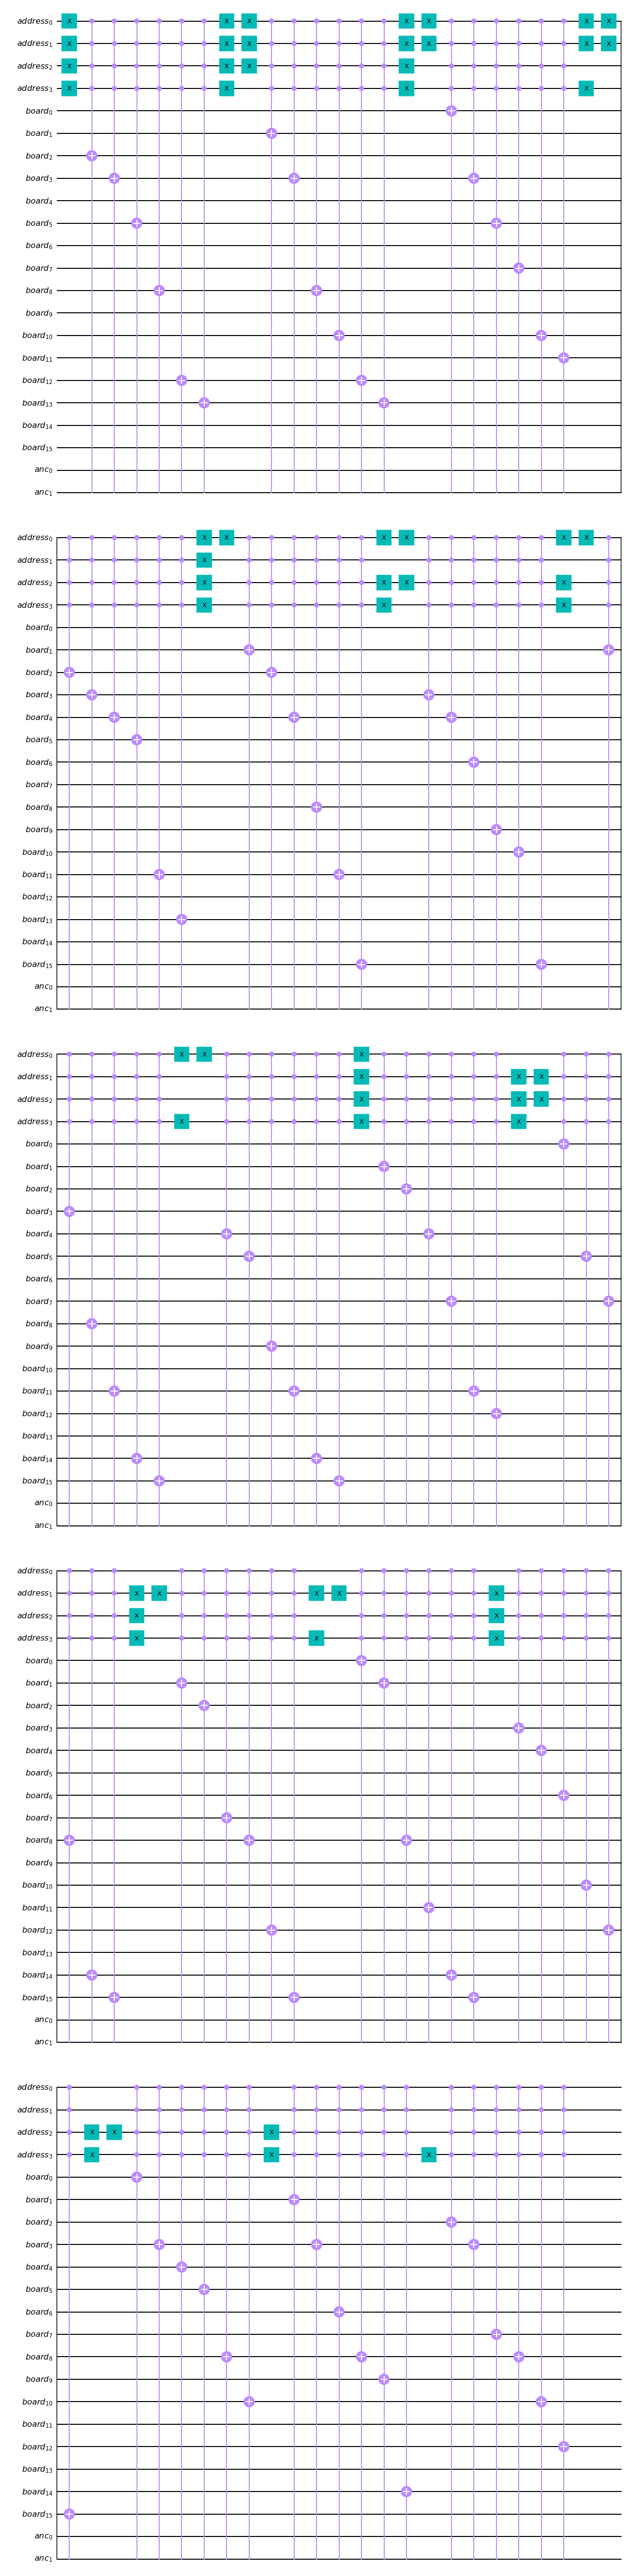

In [64]:
address = QuantumRegister(4,'address')
board = QuantumRegister(16,'board')
ancilla = QuantumRegister(2,'anc')

qram = QuantumCircuit(address,board,ancilla)

address_list=[[0,0,0,0],[0,0,0,1],[0,0,1,0],[0,0,1,1],[0,1,0,0],[0,1,0,1],[0,1,1,0],[0,1,1,1],
              [1,0,0,0],[1,0,0,1],[1,0,1,0],[1,0,1,1],[1,1,0,0],[1,1,0,1],[1,1,1,0],[1,1,1,1]]

for j in range(len(address_list)):
    zeros=[i for i, el in enumerate(address_list[j]) if el == 0]
    if zeros:
        qram.x(address[zeros])
    for k in range(0,len(indices[j])):
        qram.mct(address[:],board[indices[j][k]],ancilla[0:2],mode='basic')
    if zeros:
        qram.x(address[zeros])
    
qram.draw(output='mpl')

In [65]:
qram_gate=qram.to_gate()

In [66]:
qram_gate.name='QRAM'

In [67]:
qram_gate.num_qubits

22

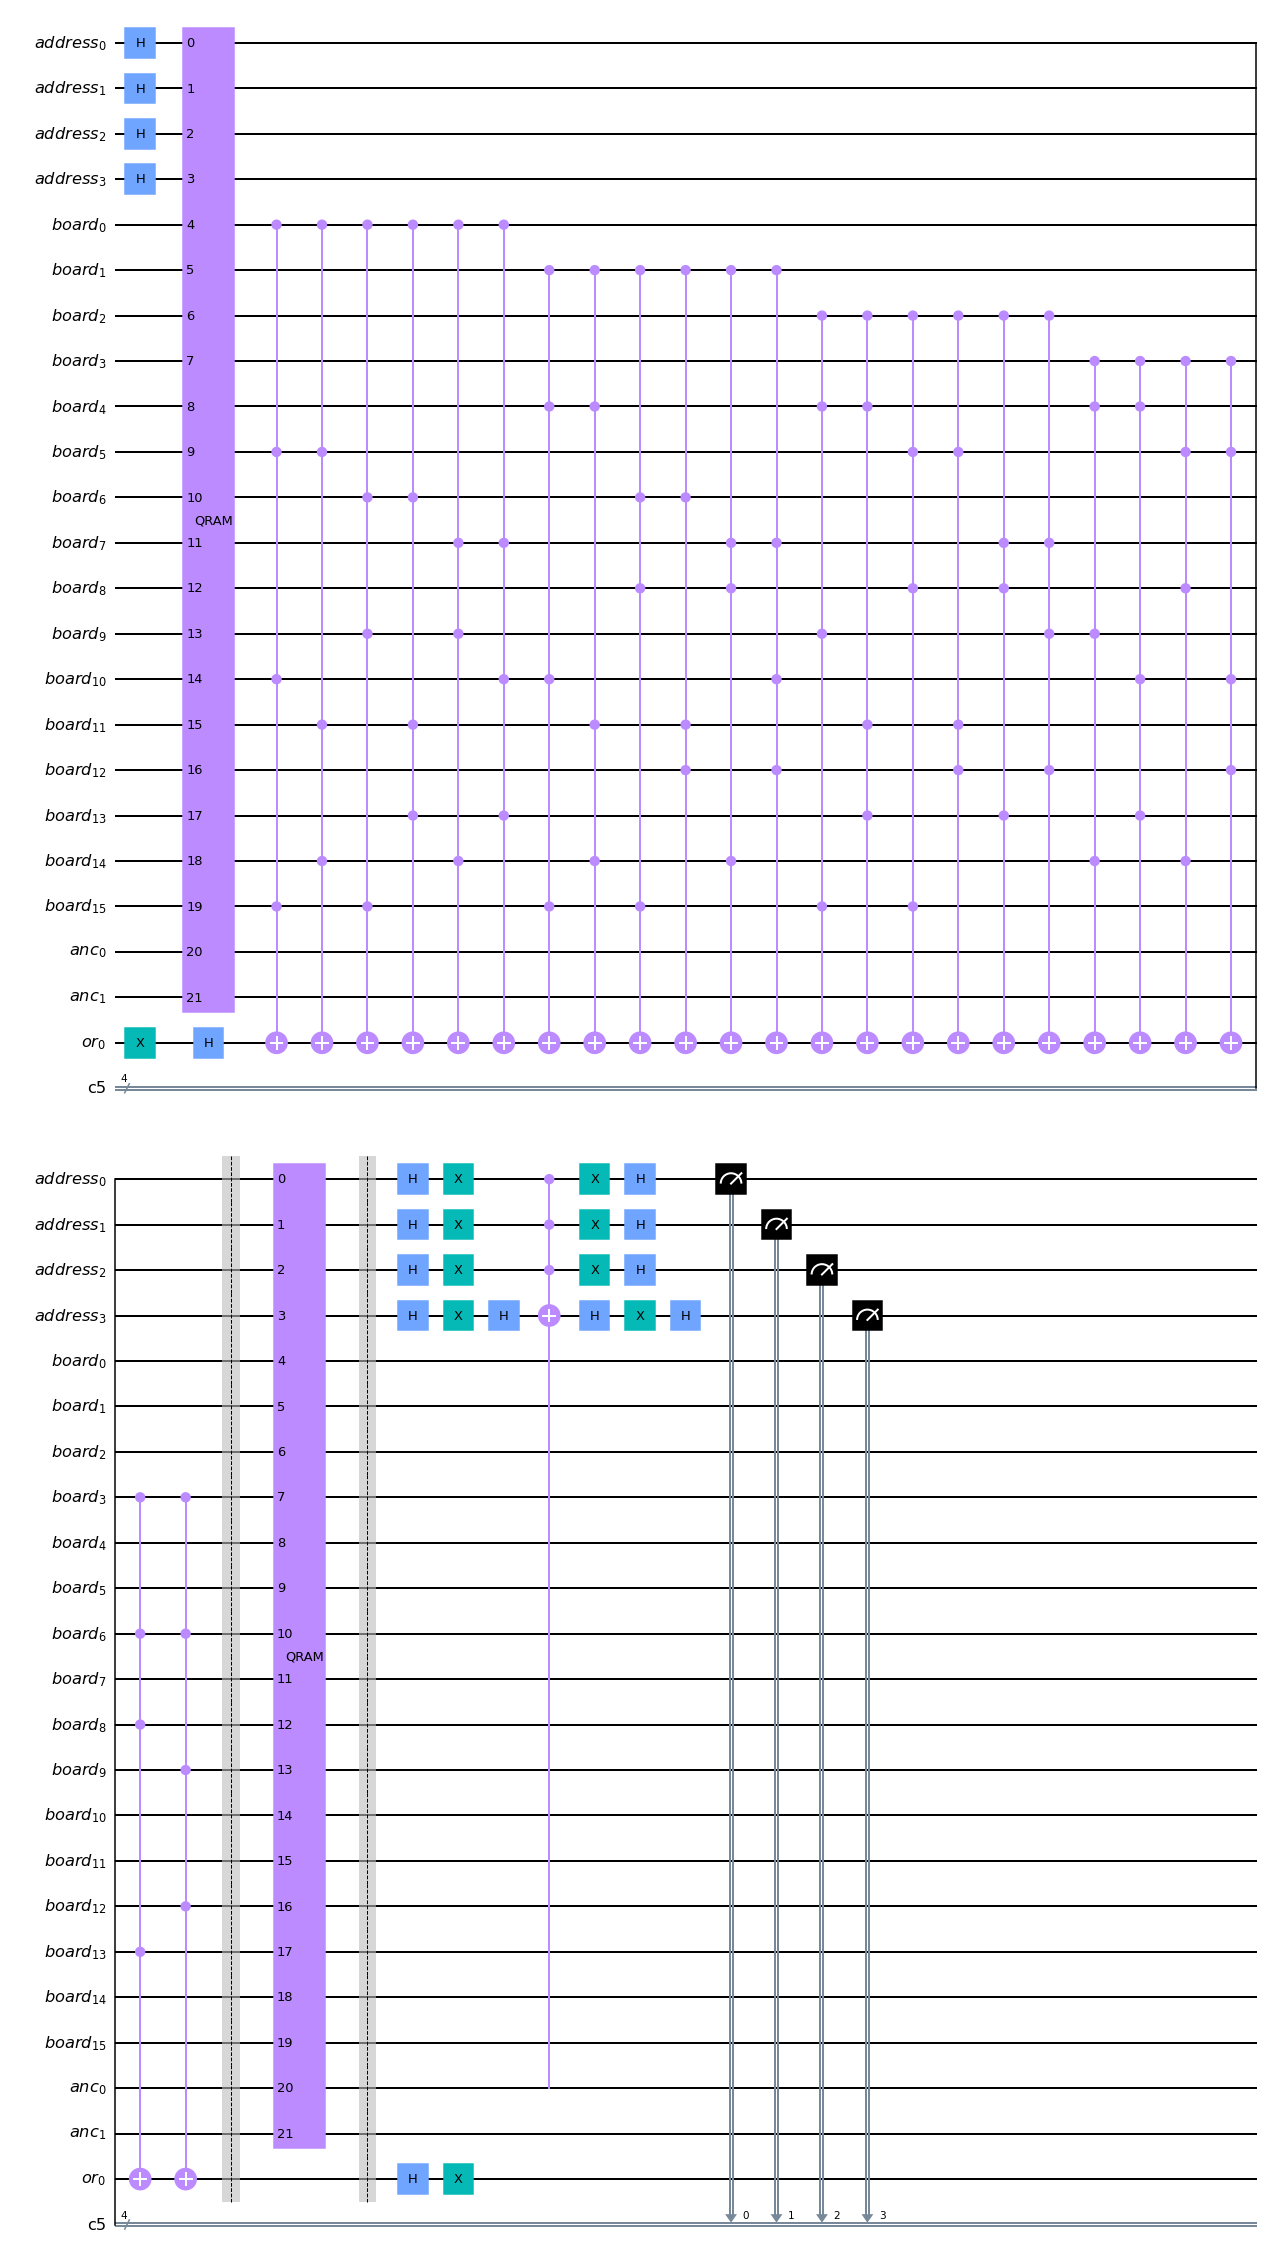

In [68]:
address = QuantumRegister(4,'address')
board = QuantumRegister(16,'board')
oracle = QuantumRegister(1,'or')
ancilla = QuantumRegister(2,'anc')
cr = ClassicalRegister(4)

qc = QuantumCircuit(address,board,ancilla,oracle,cr)

qc.h(address[:])
qc.x(oracle[0])
qc.h(oracle[0])


qc.append(qram_gate,range(qram_gate.num_qubits))


#oracle

for row1 in range(4):
    r2 = [i for i in range(4) if i!=row1]
    for row2 in r2:
        r3 = [i for i in range(4) if i!=row1 and i!=row2]
        for row3 in r3:
            row4 = [i for i in range(4) if i!=row1 and i!=row2 and i!=row3][0]
            
            qc.mct([board[row1],board[4+row2],board[8+row3],board[12+row4]],oracle[0],ancilla[0:2],mode='basic')



qc.barrier()


qc.append(qram_gate,range(qram_gate.num_qubits))


qc.barrier()

qc.h(address[:])
qc.x(address[:])
qc.h(address[3])
qc.mct(address[0:3], address[3], ancilla[0:2], mode='basic')
qc.h(address[3])
qc.x(address[:])
qc.h(address[:])

qc.measure(address[0],cr[0])
qc.measure(address[1],cr[1])
qc.measure(address[2],cr[2])
qc.measure(address[3],cr[3])

qc.h(oracle[0])
qc.x(oracle[0])

qc.draw(output='mpl')

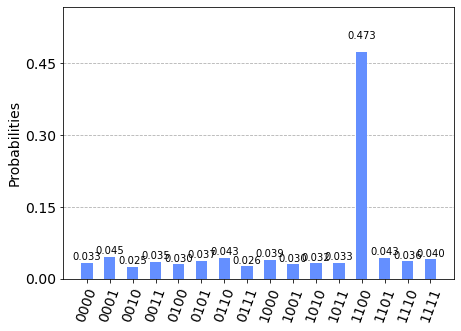

In [69]:
shots = 1000
results = execute(qc, backend=backend, shots=shots).result()
answer = results.get_counts()
plot_histogram(answer)